In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_train: pd.DataFrame = pd.read_csv("../data/train.csv")
df_test: pd.DataFrame = pd.read_csv("../data/test_public.csv")

In [3]:
df_train.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [4]:
len(df_train)

1710670

In [5]:
df_train["TARGET"] = df_train["POLYLINE"].apply(lambda x : 15 * max(x.count("[") - 1, 0))

In [6]:
df_train["YEAR"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).year)
df_train["WK_OF_YR"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).isocalendar().week)
df_train["WK_DAY"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).weekday()) # WHY ARE YOU LIKE THIS??? ALL THE OTHERS ARE FIELDS
df_train["QTR_HR"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).hour + 0.25 * (datetime.fromtimestamp(x).minute // 15))

df_train["MONTH"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).month)
df_train["DAY"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).day)
df_train["WEEKDAY"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).weekday()) # WHY ARE YOU LIKE THIS??? ALL THE OTHERS ARE FIELDS
df_train["HR"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).hour)
df_train["MIN"] = df_train["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).minute)

df_test["YEAR"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).year)
df_test["WK_OF_YR"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).isocalendar().week)
df_test["WK_DAY"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).weekday()) # WHY ARE YOU LIKE THIS??? ALL THE OTHERS ARE FIELDS
df_test["QTR_HR"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).hour + 0.25 * (datetime.fromtimestamp(x).minute // 15))
df_test["MONTH"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).month)
df_test["DAY"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).day)
df_test["WEEKDAY"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).weekday()) # WHY ARE YOU LIKE THIS??? ALL THE OTHERS ARE FIELDS
df_test["HR"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).hour)
df_test["MIN"] = df_test["TIMESTAMP"].apply(lambda x: datetime.fromtimestamp(x).minute)


In [7]:
df_test.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,YEAR,WK_OF_YR,WK_DAY,QTR_HR,MONTH,DAY,WEEKDAY,HR,MIN
0,T1,B,NaN,15.0,20000542,1408039037,A,False,2014,33,3,10.75,8,14,3,10,57
1,T2,B,NaN,57.0,20000108,1408038611,A,False,2014,33,3,10.75,8,14,3,10,50
2,T3,B,NaN,15.0,20000370,1408038568,A,False,2014,33,3,10.75,8,14,3,10,49
3,T4,B,NaN,53.0,20000492,1408039090,A,False,2014,33,3,10.75,8,14,3,10,58
4,T5,B,NaN,18.0,20000621,1408039177,A,False,2014,33,3,10.75,8,14,3,10,59


In [8]:
mean, std = df_train["TARGET"].mean(), df_train["TARGET"].std()

In [9]:
max(df_train["TARGET"])

58215

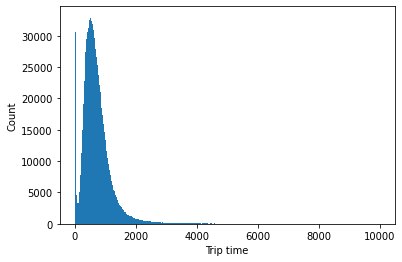

In [10]:
%matplotlib inline
plt.xlabel("Trip time")
plt.ylabel("Count")
plt.hist(df_train["TARGET"],bins=np.arange(start=0, stop=10000, step=15))
plt.show()

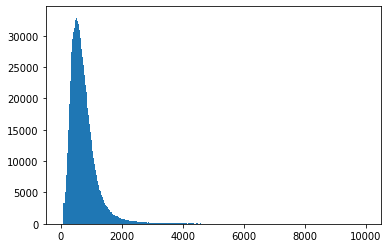

In [11]:
df_trimmed = df_train[df_train["TARGET"] < 10000]
df_trimmed = df_trimmed[df_trimmed["TARGET"] > 50]
plt.hist(df_trimmed["TARGET"],bins=np.arange(start=0, stop=10000, step=15))
plt.show()

### Exploratory analysis of taxi id's and time of days

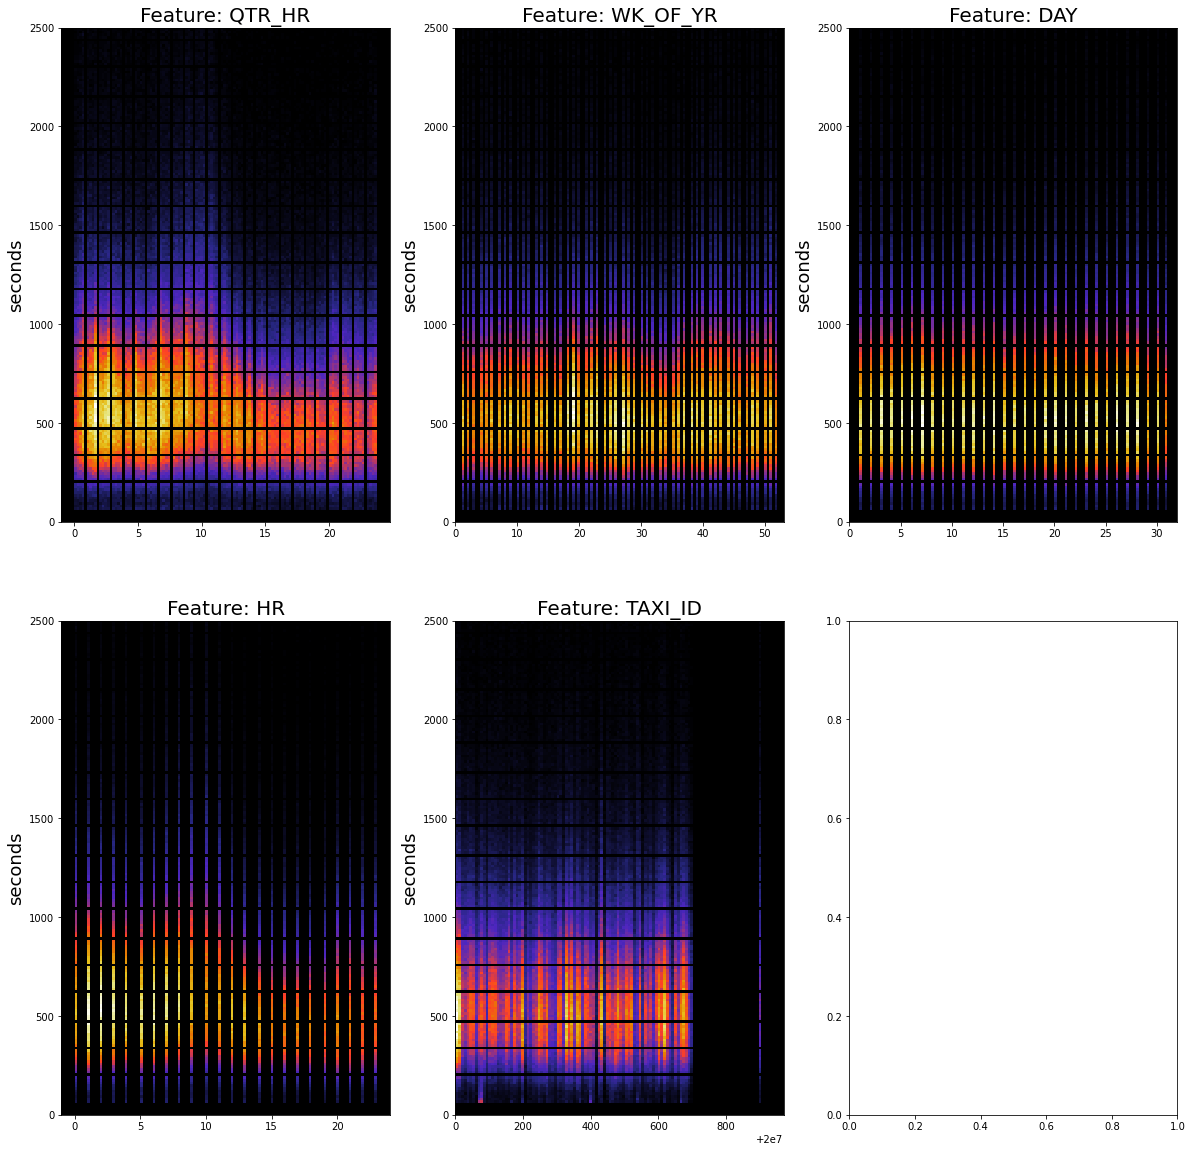

In [12]:
buckets = (int(mean + 15 * std) // 15)
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)

for idx, v in enumerate(["QTR_HR", "WK_OF_YR", "DAY", "HR", "TAXI_ID"]):
    # idx // 3 = row, idx % 3 = column
    ax = axs[idx // 3, idx % 3]

    # Remove any rows with invalid values
    # df_subset = df_trimmed.dropna(subset=v)

    # Create a histogram. Look up the documentation for more details
    ax.hist2d(df_trimmed[v][:-1], df_trimmed["TARGET"][:-1], cmap="CMRmap", bins=(120, buckets))

    # Some stylistic things to make the graphs look nice
    ax.set_xlim(ax.get_xlim()[0] - 1, ax.get_xlim()[1] + 1)
    ax.set_facecolor("black")
    ax.set_ylabel("seconds", fontsize=18)
    ax.set_title(f"Feature: {v}", fontsize=20)
    ax.set_ylim(0, 2500)

plt.show()

### Exploratory analysis cont.

<BarContainer object of 12 artists>

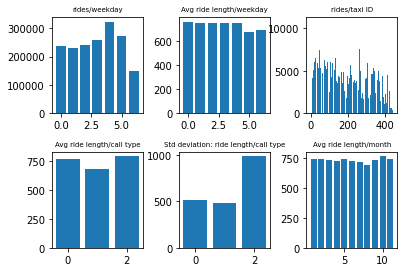

In [20]:
%matplotlib inline
# plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
plt.title("rides/weekday", fontdict={"fontsize":7})
plt.bar(range(0, 7), [len(df_train[df_train["WEEKDAY"] == i]) for i in range(7)])
plt.subplot(2, 3, 2)
plt.title("Avg ride length/weekday", fontdict={"fontsize":7})
plt.bar(range(0, 7), [df_train[df_train["WEEKDAY"] == i]["TARGET"].mean() for i in range(7)])
plt.subplot(2, 3, 3)
plt.title("rides/taxi ID", fontdict={"fontsize":7})
plt.bar(range(0, 448), [len(df_train[df_train["TAXI_ID"] == i]) for i in df_train["TAXI_ID"].unique()])
plt.subplot(2, 3, 4)
plt.title("Avg ride length/call type", fontdict={"fontsize":7})
plt.bar(range(3), [df_train[df_train["CALL_TYPE"] == "A"]["TARGET"].mean(), df_train[df_train["CALL_TYPE"] == "B"]["TARGET"].mean(), df_train[df_train["CALL_TYPE"] == "C"]["TARGET"].mean()])
plt.subplot(2, 3, 5)
plt.title("Std deviation: ride length/call type", fontdict={"fontsize":7})
plt.bar(range(3), [df_train[df_train["CALL_TYPE"] == "A"]["TARGET"].std(), df_train[df_train["CALL_TYPE"] == "B"]["TARGET"].std(), df_train[df_train["CALL_TYPE"] == "C"]["TARGET"].std()])
plt.subplot(2, 3, 6)
plt.title("Avg ride length/month", fontdict={"fontsize":7})
plt.bar(range(0, 12), [df_train[df_train["MONTH"] == i]["TARGET"].mean() for i in range(12)])

In [14]:
start_coords = np.load("../start_full.npy")
end_coords = np.load("../end_full.npy")

### Normal Heatmap

In [15]:
len(start_coords)
# len(df)

1710670

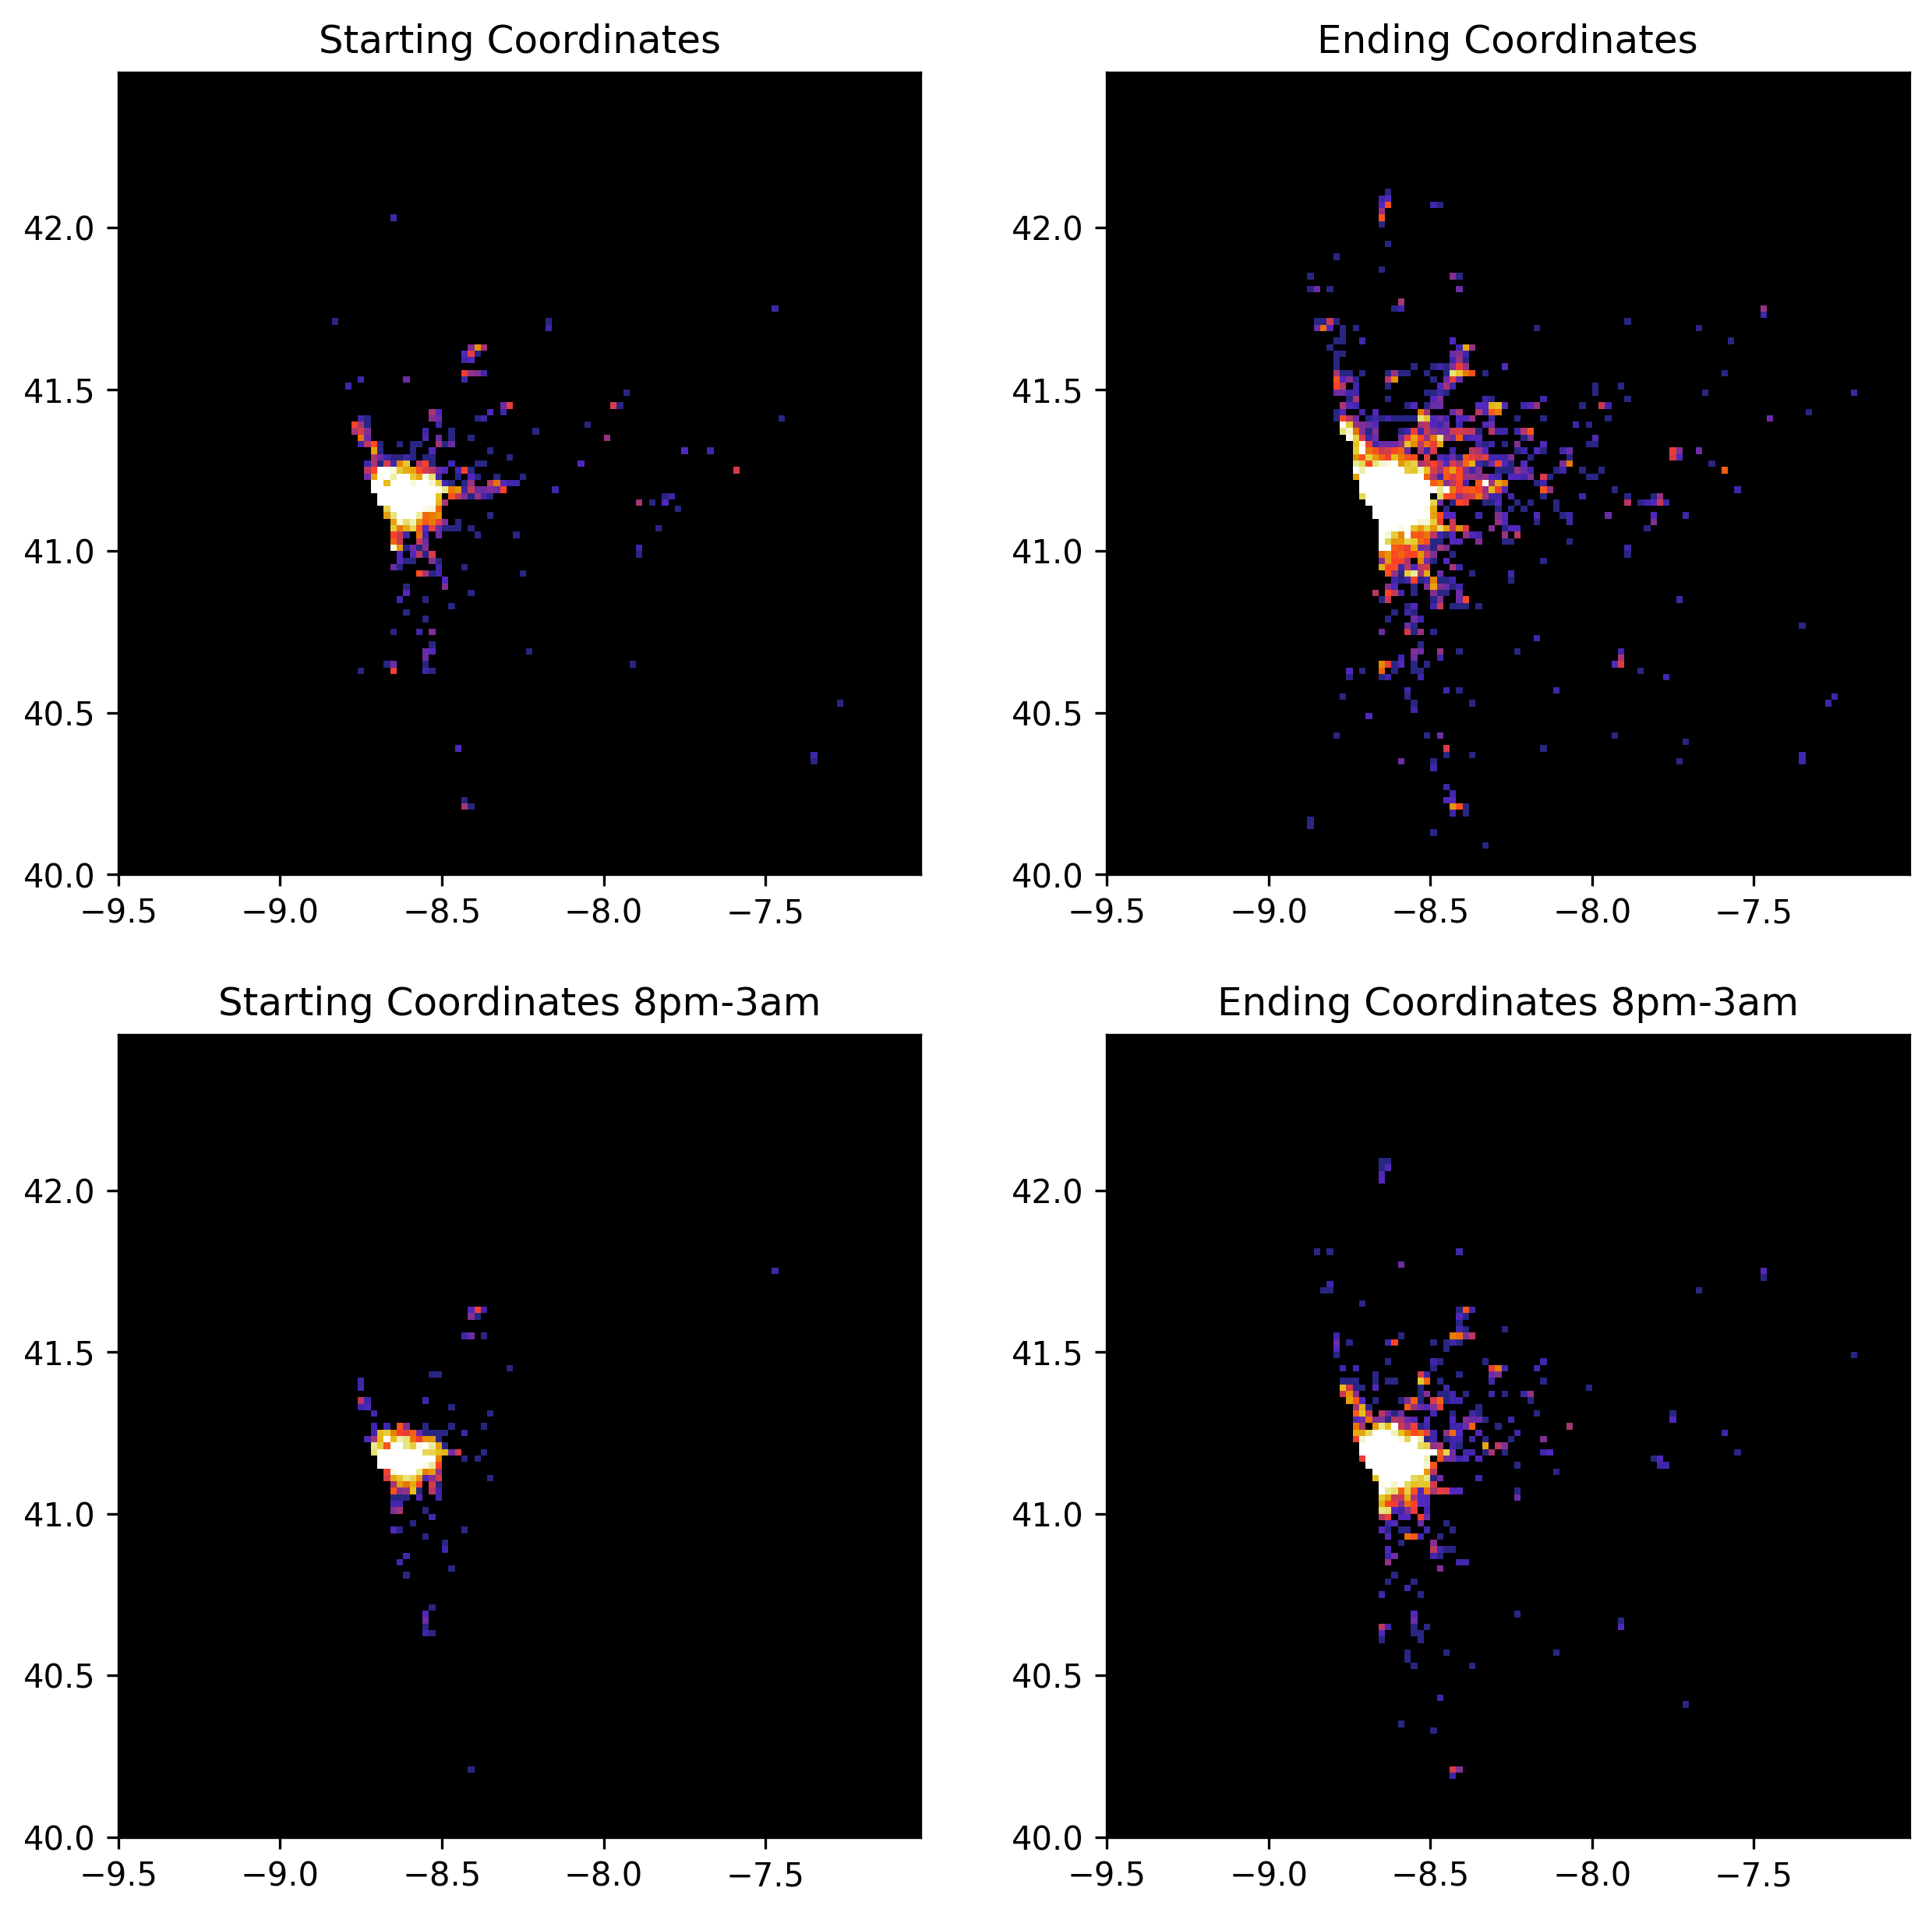

In [16]:
from matplotlib.colors import LogNorm
%matplotlib inline
fig: plt.Figure = plt.figure()
fig.set_size_inches(10, 10)
fig.set_dpi(300)
bucket_interval = 0.02


ax1: plt.Axes = fig.add_subplot(2, 2, 1, aspect="equal")
ax1.set_title("Starting Coordinates")
ax1.set_facecolor("black")
ax1.hist2d(start_coords[:, 0], start_coords[:, 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=200, clip=True), cmap="CMRmap")

ax2: plt.Axes = fig.add_subplot(2, 2, 2, aspect="equal")
ax2.set_title("Ending Coordinates")
ax2.set_facecolor("black")
ax2.hist2d(end_coords[:, 0], end_coords[:, 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=200, clip=True), cmap="CMRmap")


ax3: plt.Axes = fig.add_subplot(2, 2, 3, aspect="equal")
ax3.set_title("Starting Coordinates 8pm-3am")
ax3.set_facecolor("black")
ax3.hist2d(start_coords[(df_train["HR"] > 20) | (df_train["HR"] < 3), 0], start_coords[(df_train["HR"] > 20) | (df_train["HR"] < 3), 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=200, clip=True), cmap="CMRmap")

ax4: plt.Axes = fig.add_subplot(2, 2, 4, aspect="equal")
ax4.set_title("Ending Coordinates 8pm-3am")
ax4.set_facecolor("black")
ax4.hist2d(end_coords[(df_train["HR"] > 20) | (df_train["HR"] < 3), 0], end_coords[(df_train["HR"] > 20) | (df_train["HR"] < 3), 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=200, clip=True), cmap="CMRmap")

# ax3: plt.Axes = fig.add_subplot(2, 3, 5)
# ax3.set_title("Ending Coordinates after 8pm")
# ax3.set_facecolor("black")
# ax3.hist2d(end_coords[df["HR"] > 20, 0], end_coords[df["HR"] > 20, 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(), cmap="CMRmap")

plt.show()

### Heatmaps by call type

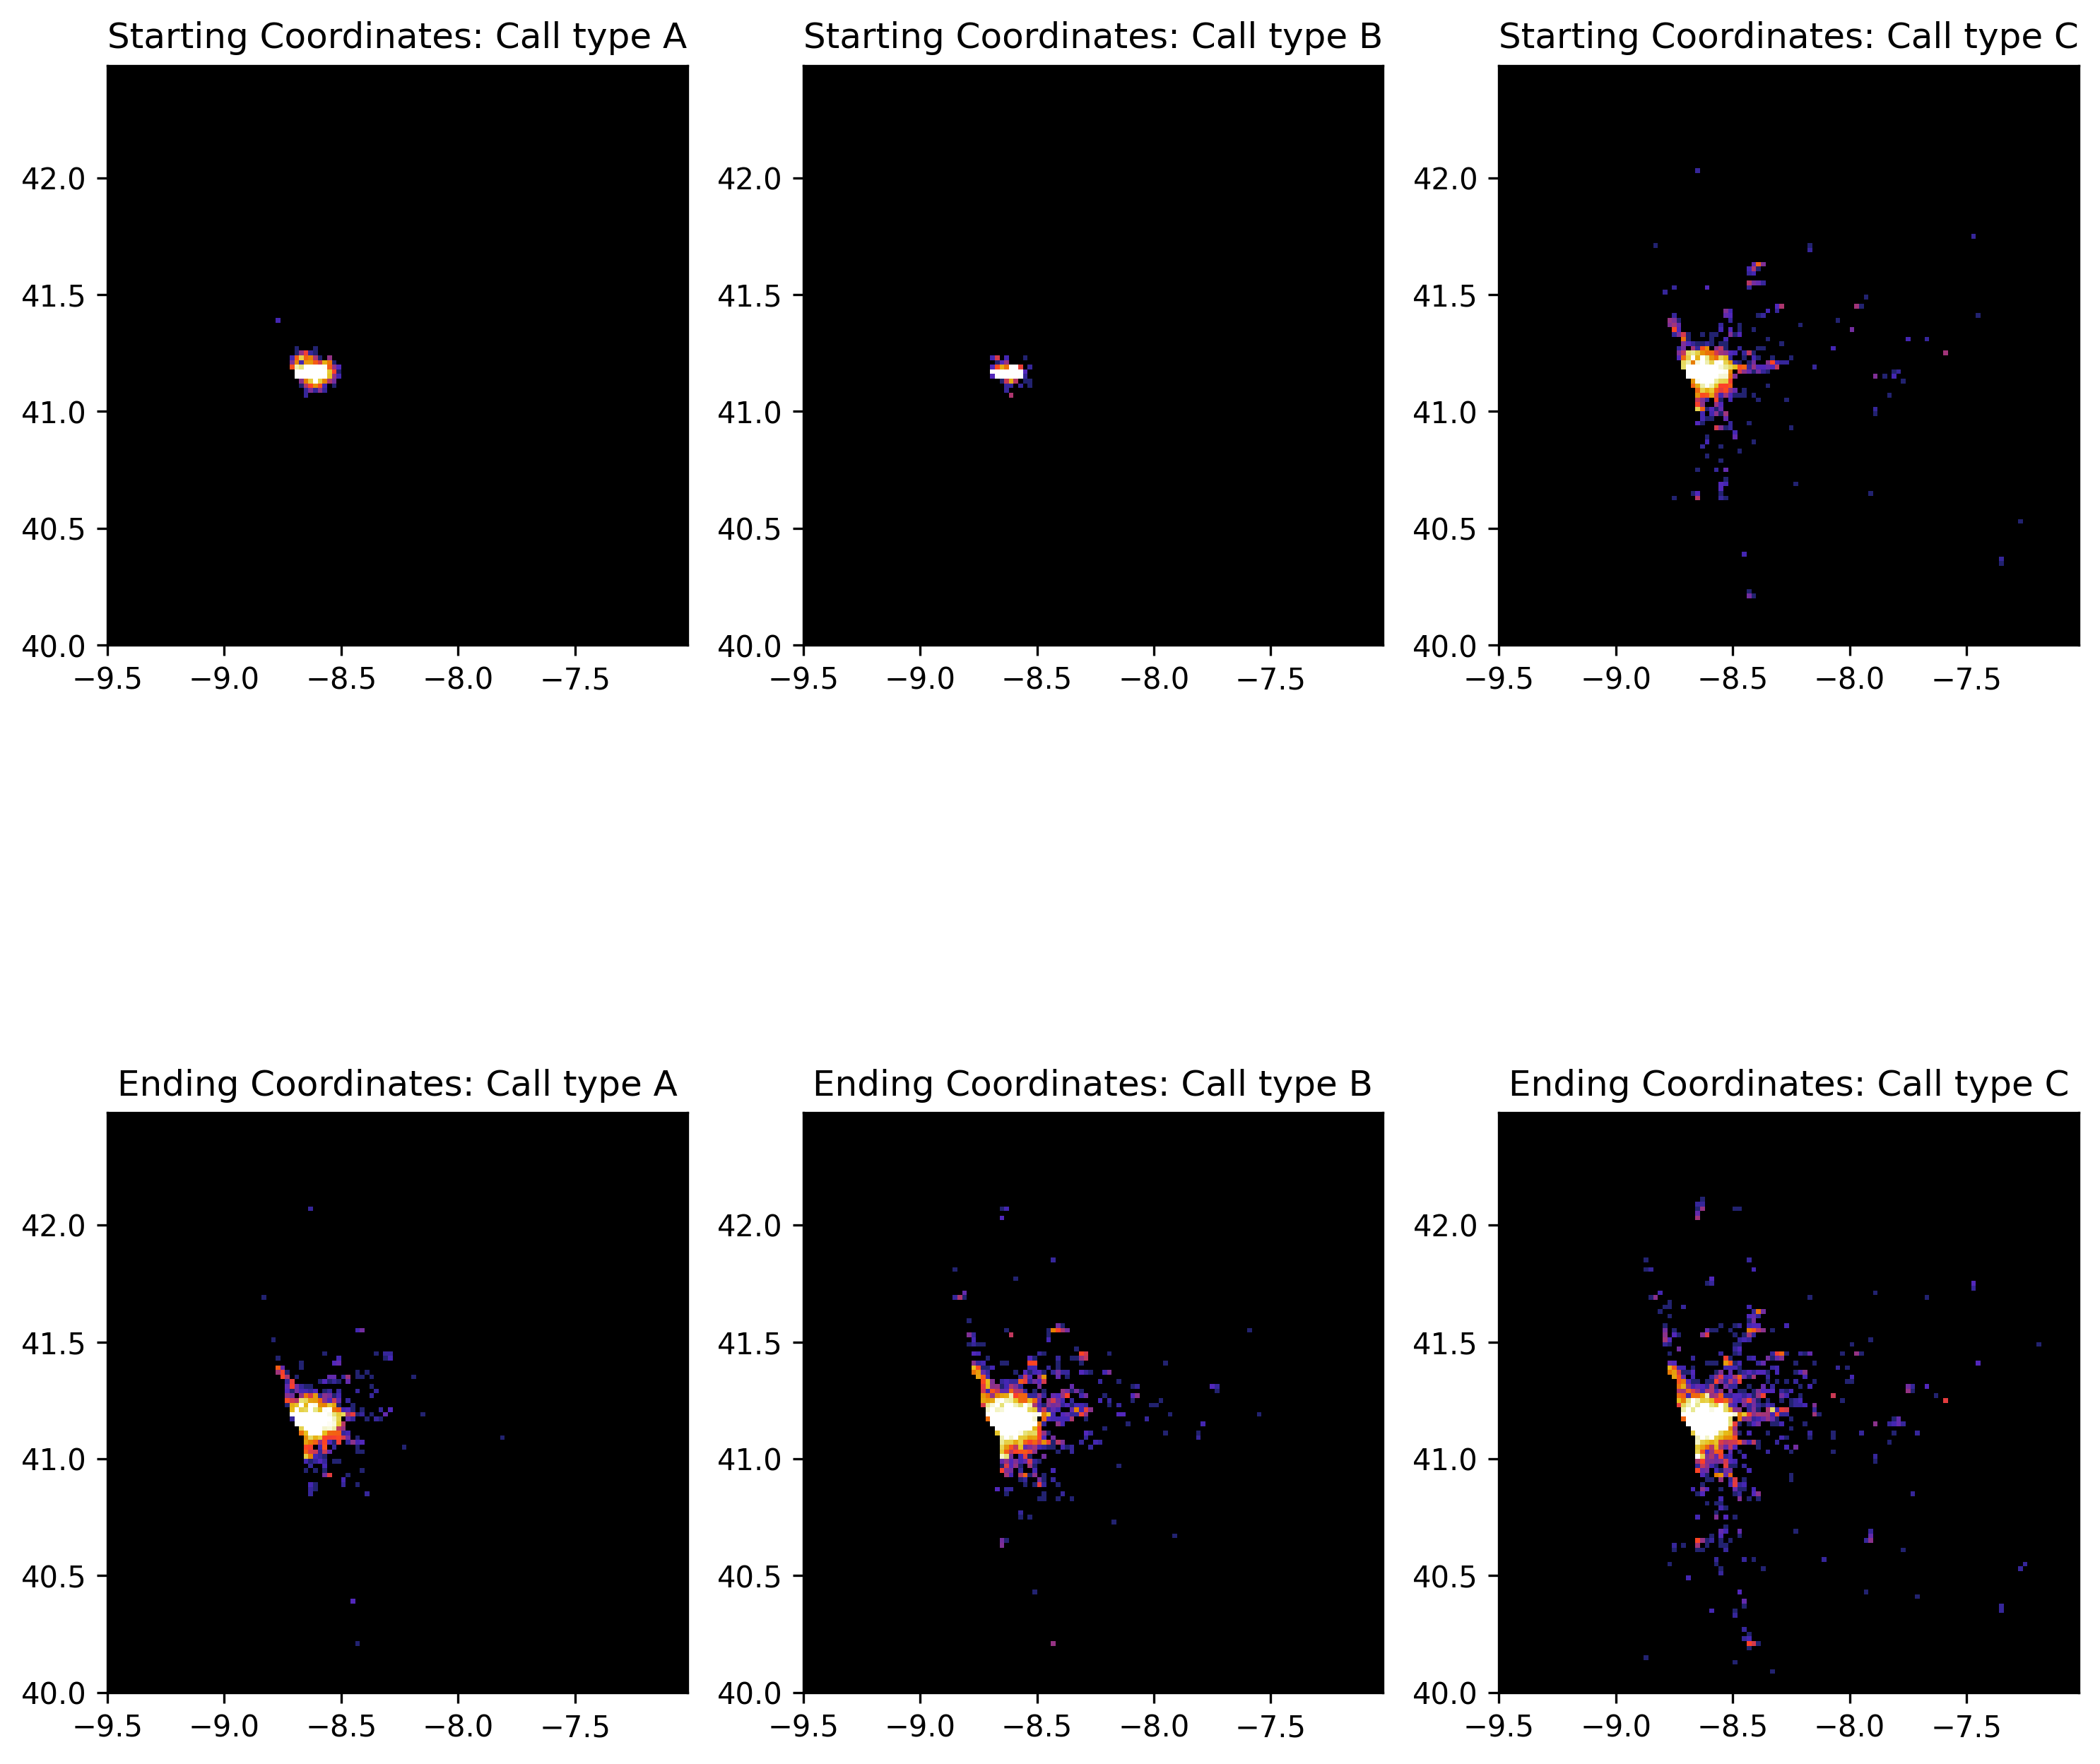

In [17]:
fig: plt.Figure = plt.figure()
fig.set_dpi(300)
fig.set_size_inches(12, 12)
plt.tight_layout()

ax1: plt.Axes = fig.add_subplot(2, 3, 1, aspect="equal")
ax1.set_title("Starting Coordinates: Call type A")
ax1.set_facecolor("black")
ax1.hist2d(start_coords[df_train["CALL_TYPE"] == "A", 0], start_coords[df_train["CALL_TYPE"] == "A", 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=500, clip=True), cmap="CMRmap")

ax4: plt.Axes = fig.add_subplot(2, 3, 4, aspect="equal")
ax4.set_title("Ending Coordinates: Call type A")
ax4.set_facecolor("black")
ax4.hist2d(end_coords[df_train["CALL_TYPE"] == "A", 0], end_coords[df_train["CALL_TYPE"] == "A", 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=500, clip=True), cmap="CMRmap")

ax2: plt.Axes = fig.add_subplot(2, 3, 2, aspect="equal")
ax2.set_title("Starting Coordinates: Call type B")
ax2.set_facecolor("black")
ax2.hist2d(start_coords[df_train["CALL_TYPE"] == "B", 0], start_coords[df_train["CALL_TYPE"] == "B", 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=500, clip=True), cmap="CMRmap")

ax5: plt.Axes = fig.add_subplot(2, 3, 5, aspect="equal")
ax5.set_title("Ending Coordinates: Call type B")
ax5.set_facecolor("black")
ax5.hist2d(end_coords[df_train["CALL_TYPE"] == "B", 0], end_coords[df_train["CALL_TYPE"] == "B", 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=500, clip=True), cmap="CMRmap")

ax3: plt.Axes = fig.add_subplot(2, 3, 3, aspect="equal")
ax3.set_title("Starting Coordinates: Call type C")
ax3.set_facecolor("black")
ax3.hist2d(start_coords[df_train["CALL_TYPE"] == "C", 0], start_coords[df_train["CALL_TYPE"] == "C", 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=500, clip=True), cmap="CMRmap")

ax6: plt.Axes = fig.add_subplot(2, 3, 6, aspect="equal")
ax6.set_title("Ending Coordinates: Call type C")
ax6.set_facecolor("black")
ax6.hist2d(end_coords[df_train["CALL_TYPE"] == "C", 0], end_coords[df_train["CALL_TYPE"] == "C", 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=500, clip=True), cmap="CMRmap")

plt.show()


### More detailed heatmap (Comment out if lag is bad)

In [18]:
# import folium
# from folium.plugins import HeatMap
# map_obj = folium.Map(location = [40, -7], zoom_start = 7, control_scale=True)


# HeatMap(start_coords[:, ::-1], 
#         radius=5, 
#         blur=10, 
#         min_opacity=0.1, 
#         max_opacity=0.8,
#         gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 0.8: 'red'}).add_to(map_obj)

# map_obj


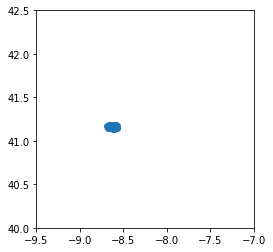

In [19]:
df_metadata = pd.read_csv("../data/metaData_taxistandsID_name_GPSlocation.csv")
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect("equal")
ax.set_xlim(-9.5, -7)
ax.set_ylim(40, 42.5)
ax.scatter(df_metadata["Longitude"], df_metadata["Latitude"])
plt.show()

### Heatmap by taxi drivers (most of them)

In [20]:
df_c = df_train[df_train["CALL_TYPE"] == "C"]
start_coords_c = start_coords[df_train["CALL_TYPE"] == "C"]
taxis = df_c["TAXI_ID"].unique()
fig = plt.figure()
fig.set_dpi(300)
fig.set_size_inches(40, 40)
fig.tight_layout()
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, aspect="equal")
    ax.set_title(f"{i}")
    ax.hist2d(start_coords_c[df_c["TAXI_ID"] == taxis[i], 0], start_coords_c[df_c["TAXI_ID"] == taxis[i], 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=100, clip=True), cmap="CMRmap")
plt.show()

In [21]:
end_coords_c = end_coords[df_train["CALL_TYPE"] == "C"]
fig = plt.figure()
fig.set_dpi(300)
fig.set_size_inches(40, 40)
fig.tight_layout()
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, aspect="equal")
    ax.set_title(f"{i}")
    ax.hist2d(end_coords_c[df_c["TAXI_ID"] == taxis[i], 0], end_coords_c[df_c["TAXI_ID"] == taxis[i], 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=100, clip=True), cmap="CMRmap")
plt.show()

In [22]:
df_train["START_LONG"] = start_coords[:, 0]
df_train["START_LAT"] = start_coords[:, 1]
df_train["END_LONG"] = end_coords[:, 0]
df_train["END_LAT"] = end_coords[:, 1]

In [23]:
from sklearn import metrics
central_long = df_train[df_train["CALL_TYPE"] == "A"]["START_LONG"].median()
central_lat = df_train[df_train["CALL_TYPE"] == "A"]["START_LAT"].median()
center = np.array([central_lat, central_long], dtype=np.float64)
center = np.radians(center)

coords_train = df_train[["START_LAT", "START_LONG"]].to_numpy()
coords_train = np.radians(coords_train)
dists_train = metrics.pairwise.haversine_distances(coords_train, center.reshape(1, -1))
dists_train *= 6371000/1000

In [24]:
df_train["DIST"] = dists_train

In [25]:
max(df_train["DIST"])

5472.886805870172

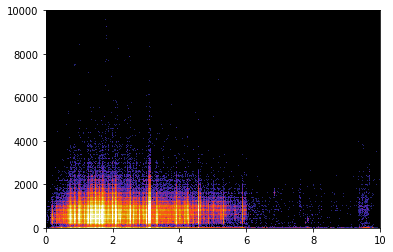

In [26]:
bucket_interval = 0.02
plt.hist2d(df_train["DIST"], df_train["TARGET"], bins=[np.arange(0, 10, bucket_interval), np.arange(0, 40000, 20)], norm=LogNorm(vmax=500, clip=True), cmap="CMRmap")
plt.xlim(0, 10)
plt.ylim(0, 10000)
plt.show()

In [27]:
# %matplotlib qt
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(df_train["START_LONG"], df_train["START_LAT"], df_train["TARGET"])
# plt.show()

: 